In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Exercise 1
## a)
For an interesting dynamical system we need to take into account that in the long run, the accessible state is bounded by the vlaue of the generating function at the maximum. Contractive maps (e.g. sin(x) on [0,1])  can only have one fixpoint at zero. Non-continuous functions may be less interesting as they show some chaotic behavior right away (i. e. map two arbitrarily close points to very different values).

Our function is of the form:
$f(u)=0.9 \times sin(\pi \times u^\mu)$

In [0]:
def generating_function(u, mu):
    return 0.9*np.sin(u**mu * np.pi)

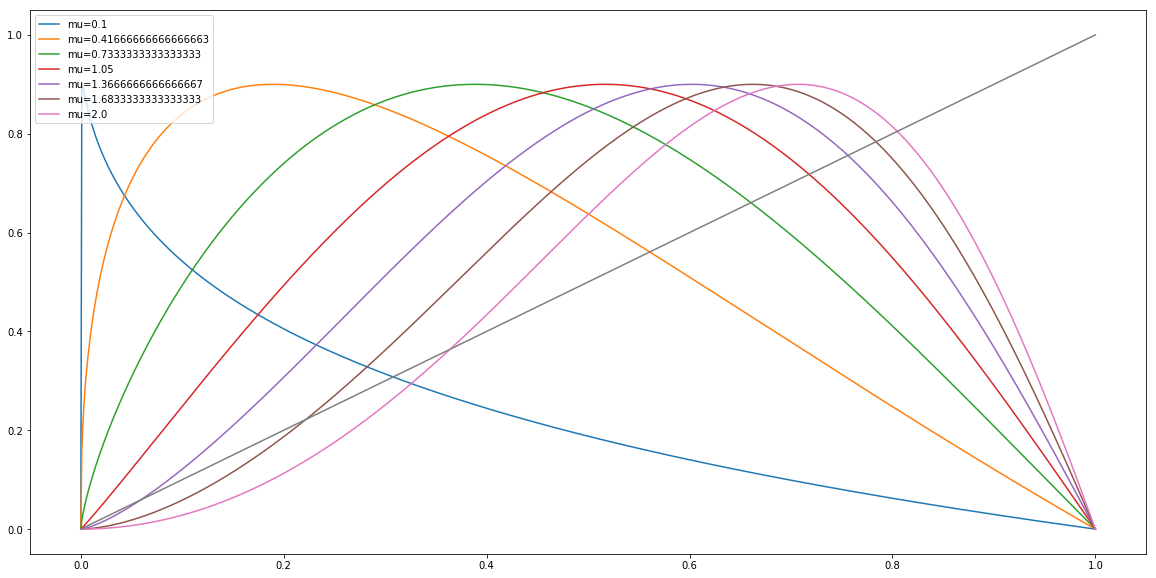

In [0]:
plt.figure(figsize=(20,10))
u_vals=np.linspace(0,1,1000)
for mu in np.linspace(0.1, 2.,7):
    plt.plot(u_vals, generating_function(u_vals, mu), label="mu=%s"%(mu))
    plt.legend()
plt.plot(u_vals, u_vals)

In [0]:
def single_mu_it(n, u, mu):
    iterates = []
    for i in range(n):
        nth_iterate = generating_function(u, mu)
        u=nth_iterate
        iterates.append(nth_iterate)
    return iterates

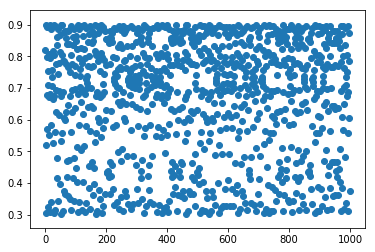

In [0]:
steps=1000
it=single_mu_it(steps, 0.4, 1.1)
it
plt.scatter(range(steps),it)

In [0]:
def stepper(u0, mu0, mu1, N_mu):
    bif_data=[]
    for i in range(N_mu):
        current_mu=mu0+(mu1-mu0)*i/N_mu
        bif_data.append(single_mu_it(spin_up+plot_steps, u0, current_mu)[spin_up:(spin_up+plot_steps)])
    return np.array(bif_data)

In [0]:
spin_up=1000
plot_steps=500
u0=0.6
mu0=0.01
mu1=2.
N_mu=10000
bif_data=stepper(u0, mu0, mu1, N_mu)
mu_range=np.repeat(np.linspace(mu0, mu1, N_mu), plot_steps)


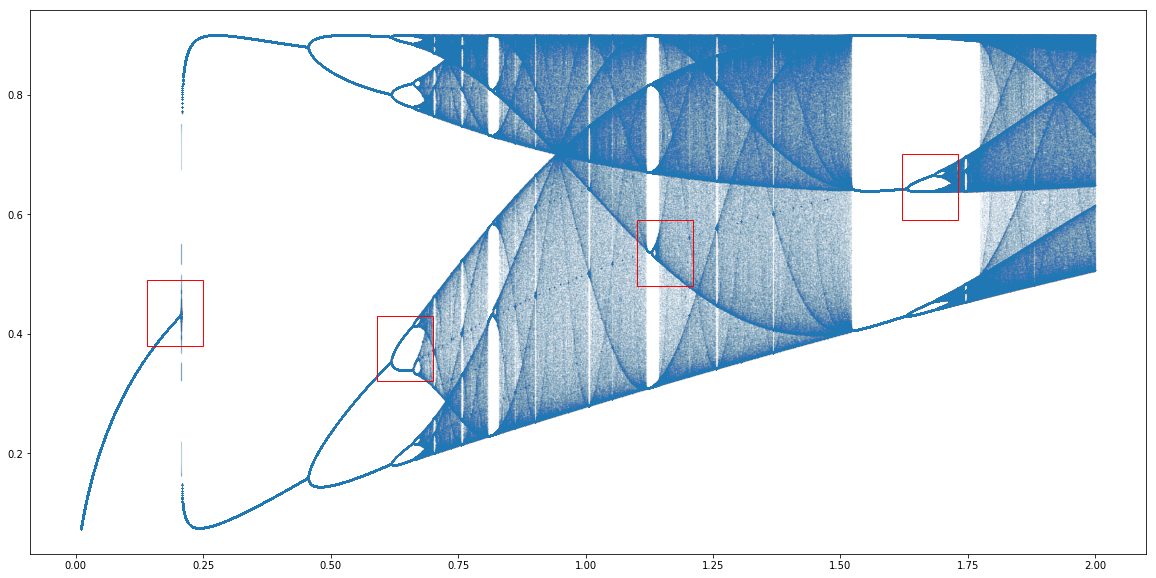

In [0]:
sqs=0.11
window1=[0.14, 0.38]
window2=[0.59, 0.32]
window3=[1.10, 0.48]
window4=[1.62, 0.59]

fig,ax = plt.subplots(1,figsize=(20,10) )
ax.scatter(mu_range, bif_data, marker='.', s=0.001)

rect1 = patches.Rectangle((window1[0],window1[1]),sqs, sqs,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect1)
rect2 = patches.Rectangle((window2[0],window2[1]),sqs, sqs,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect2)
rect3 = patches.Rectangle((window3[0],window3[1]),sqs, sqs,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect3)
rect4 = patches.Rectangle((window4[0],window4[1]),sqs, sqs,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect4)

In this dynamical system, we observe a very similar structure to the one for the logistic map. There is the characteristic period doubling for lower mu and then a transition to a chaotic regime. 

## Some interesting zooms

(0.59, 0.7)

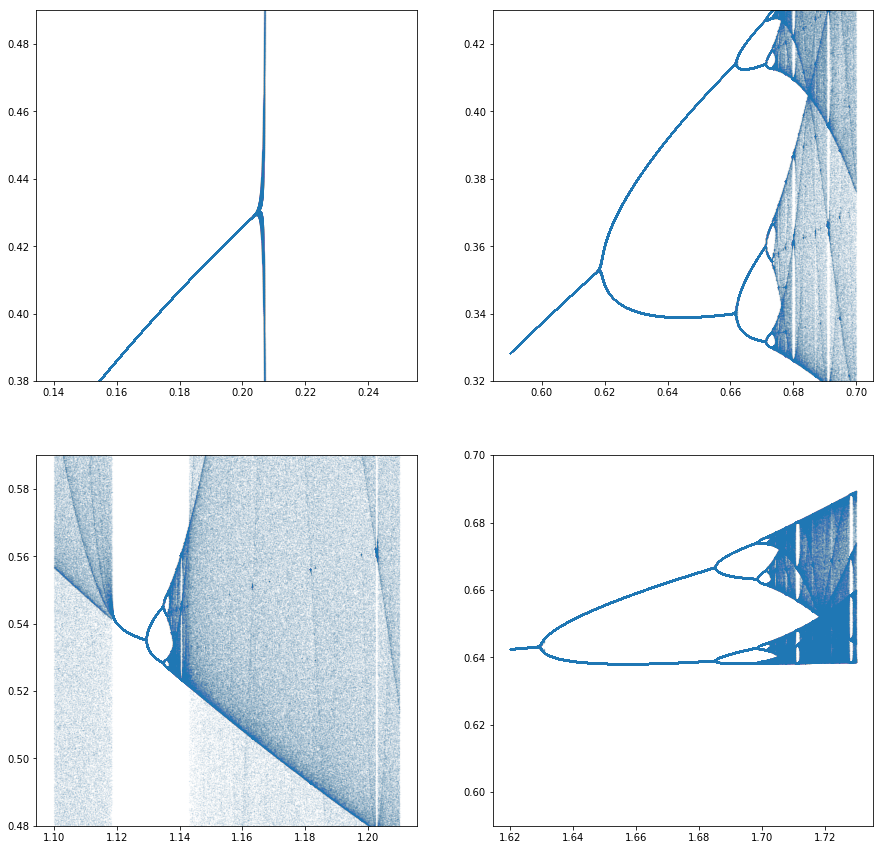

In [0]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
zoom1=stepper(u0, window1[0], window1[0]+sqs, N_mu)
mu_range=np.repeat(np.linspace(window1[0], window1[0]+sqs, N_mu), plot_steps)
plt.scatter(mu_range, zoom1, marker='.', s=0.001)
plt.ylim(window1[1], window1[1]+sqs)

plt.subplot(2,2,2)
zoom1=stepper(u0, window2[0], window2[0]+sqs, N_mu)
mu_range=np.repeat(np.linspace(window2[0], window2[0]+sqs, N_mu), plot_steps)
plt.scatter(mu_range, zoom1, marker='.', s=0.001)
plt.ylim(window2[1], window2[1]+sqs)

plt.subplot(2,2,3)
zoom1=stepper(u0, window3[0], window3[0]+sqs, N_mu)
mu_range=np.repeat(np.linspace(window3[0], window3[0]+sqs, N_mu), plot_steps)
plt.scatter(mu_range, zoom1, marker='.', s=0.001)
plt.ylim(window3[1], window3[1]+sqs)

plt.subplot(2,2,4)
zoom1=stepper(u0, window4[0], window4[0]+sqs, N_mu)
mu_range=np.repeat(np.linspace(window4[0], window4[0]+sqs, N_mu), plot_steps)
plt.scatter(mu_range, zoom1, marker='.', s=0.001)
plt.ylim(window4[1], window4[1]+sqs)

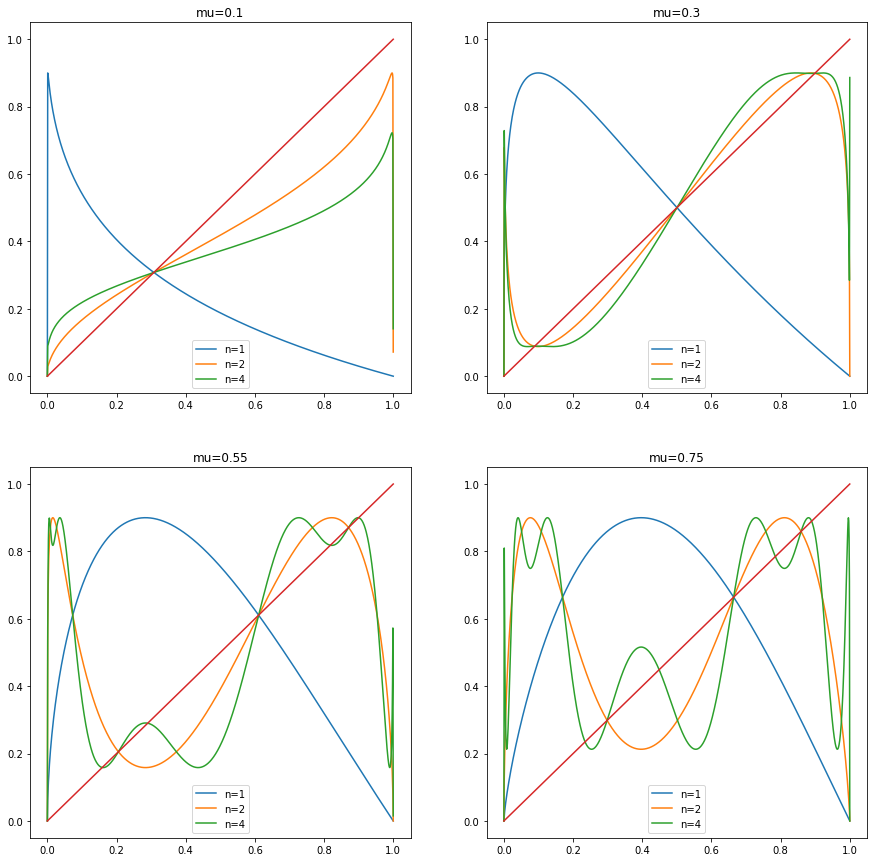

In [0]:
def nth_iterate(n, u, mu):
    for i in range(n):
        u=generating_function(u, mu)
    return u
plt.figure(figsize=(15,15))
i=1
for mu in [0.1, 0.3, 0.55,0.75]:
    plt.subplot(2,2,i )
    for n in [1,2, 4]:
        plt.plot(u_vals, nth_iterate(n,u_vals,mu))
        plt.legend( ["n=1","n=2","n=4"])
    plt.title("mu=%s"%(mu))
    plt.plot(u_vals, u_vals)
    i=i+1

At mu=0.1, we see that the first iterate intersects the diagonal at an obtuse angle, giving a derivative within (0,-1) and thus providing for one stable fixpoint at the intersection.

At mu=0.3 the derivative of the first iterate at the fixpoint has gone lower than -1, but the second iterate now has two intersections with the diagonal, producing two period two fixpoints.

At mu=0.55, the period two fixpoint has also lost stability, giving rise to a period 4 one.

At mu=0.75, none of the iterates have intersections with slopes in the stable interval.